<font size=5> **Looking at Vaccine Effectiveness Against Hospitalizations Regarding COVID-19** </font>   
<br/>
Gabriel Sagrera  
[Link to Github site](https://gsagrera.github.io/)

<font size=3> **Project Goals**</font>  
For this project I will be investigating datasets regarding COVID-19 such as hospitalizations, positive cases, and vaccinations in Louisiana. These will be looked at to see if vaccination show a distinct reduction in cases and at what point it occurs. The data is taken from the [Louisiana Department of Health](https://ldh.la.gov/page/louisiana-coronavirus) website getting data that is split into parishes and has day to day updates.

<font size=3> **Extraction, Transformation, and Load**</font>  
There are currently three datasets that I am looking at that are downloaded from a [dataset folder](https://data.world/gsagrera/covid-data-louisiana) I created as there were issues with downloading the data in Google Colab. The first dataset is the amount of hospitalized patients in Louisiana defined as patient admissions confirmed to have COVID-19.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hospitalizations = pd.read_excel('https://query.data.world/s/s3ww36eg7dxvvbxybnb4csyjpn5wik?dws=00000')
hospitalizations.head(15)

,DateTime,Unnamed: 1
0,3/14/20,NaN
1,3/15/20,NaN
2,3/16/20,NaN
3,3/17/20,NaN
4,3/18/20,NaN
5,3/19/20,NaN
6,3/20/20,NaN
7,3/21/20,NaN
8,3/22/20,NaN
9,3/23/20,NaN


As can be seen, the dataset can be cleaned up by changing the column names and make the date easier to handle in pandas.

In [3]:
hospitalizations.rename(columns={"DateTime":"Date", "Unnamed: 1":"Hospitalizations"}, inplace=True)
hospitalizations["Date"] = pd.to_datetime(hospitalizations["Date"])
display(hospitalizations.dtypes)
hospitalizations.head(15)

Date                datetime64[ns]
Hospitalizations           float64
dtype: object

,Date,Hospitalizations
0,2020-03-14,NaN
1,2020-03-15,NaN
2,2020-03-16,NaN
3,2020-03-17,NaN
4,2020-03-18,NaN
5,2020-03-19,NaN
6,2020-03-20,NaN
7,2020-03-21,NaN
8,2020-03-22,NaN
9,2020-03-23,NaN


Now that the first dataset is cleaned up the next dataset describing tests and cases by day in each Parish. The tests are splint into total, positive, and negative counts as well as a count of new cases as a positive test does not correlate directly to new cases as new cases are new infections. As the analysis will deal with cases, the test counts can be removed from the dataset.

In [4]:
parish_cases = pd.read_excel('https://query.data.world/s/pu5qu4hofiphkuyak4nbiychdofgol?dws=00000')
parish_cases.head(15)

,Lab Collection Date,Parish,Daily Test Count,Daily Negative Test Count,Daily Positive Test Count,Daily Case Count
0,2020-03-01,Acadia,0,0,0,0
1,2020-03-02,Acadia,0,0,0,0
2,2020-03-03,Acadia,0,0,0,0
3,2020-03-04,Acadia,0,0,0,0
4,2020-03-05,Acadia,0,0,0,0
5,2020-03-06,Acadia,0,0,0,0
6,2020-03-07,Acadia,0,0,0,0
7,2020-03-08,Acadia,0,0,0,0
8,2020-03-09,Acadia,0,0,0,0
9,2020-03-10,Acadia,0,0,0,0


In [5]:
parish_cases.drop(["Daily Test Count", "Daily Negative Test Count", "Daily Positive Test Count"], axis=1, inplace=True)
parish_cases.rename(columns={"Daily Case Count":"Daily_Case_Count", "Lab Collection Date":"Date"}, inplace=True)
display(parish_cases.dtypes)
parish_cases.head(15)

Date                datetime64[ns]
Parish                      object
Daily_Case_Count             int64
dtype: object

,Date,Parish,Daily_Case_Count
0,2020-03-01,Acadia,0
1,2020-03-02,Acadia,0
2,2020-03-03,Acadia,0
3,2020-03-04,Acadia,0
4,2020-03-05,Acadia,0
5,2020-03-06,Acadia,0
6,2020-03-07,Acadia,0
7,2020-03-08,Acadia,0
8,2020-03-09,Acadia,0
9,2020-03-10,Acadia,0


The third dataset shows the amount of vaccines both partially completed and fully completed broken down by parish and date as well. The FIPS column and LDH column are redundant for the analysis as they are another way to determine the location.

In [6]:
parish_vaccines = pd.read_excel('https://query.data.world/s/6fzykgfujmvhdl3x34rc642iogb6th?dws=00000')
parish_vaccines.head()

,Location,FIPS Code,LDH Region,Vaccine Admin Date,# Vaccine Initiated,# Vaccine Completed
0,Acadia,22001.0,4.0,2020-12-14,0,0
1,Acadia,22001.0,4.0,2020-12-15,14,0
2,Acadia,22001.0,4.0,2020-12-16,29,0
3,Acadia,22001.0,4.0,2020-12-17,27,0
4,Acadia,22001.0,4.0,2020-12-18,22,0


In [7]:
parish_vaccines.drop(["FIPS Code", "LDH Region"], axis=1, inplace=True)
parish_vaccines.rename(columns={"Vaccine Admin Date":"Date", "# Vaccine Initiated":"Vaccines_Initiated", "# Vaccine Completed":"Vaccines_Completed"}, inplace=True)
display(parish_vaccines.dtypes)
parish_vaccines.head()

Location                      object
Date                  datetime64[ns]
Vaccines_Initiated             int64
Vaccines_Completed             int64
dtype: object

,Location,Date,Vaccines_Initiated,Vaccines_Completed
0,Acadia,2020-12-14,0,0
1,Acadia,2020-12-15,14,0
2,Acadia,2020-12-16,29,0
3,Acadia,2020-12-17,27,0
4,Acadia,2020-12-18,22,0


Now the null entries will be checked and replaced if necessary.

In [8]:
display(hospitalizations.isnull().sum())
display(parish_cases.isnull().sum())
parish_vaccines.isnull().sum()

Date                 0
Hospitalizations    10
dtype: int64

Date                0
Parish              0
Daily_Case_Count    0
dtype: int64

Location              0
Date                  0
Vaccines_Initiated    0
Vaccines_Completed    0
dtype: int64

In [9]:
hospitalizations["Hospitalizations"]=hospitalizations["Hospitalizations"].fillna(0)
hospitalizations.isnull().sum()

Date                0
Hospitalizations    0
dtype: int64

Now to get a visual of how the number of cases, hospitalizations, and completed vaccinations compare aline graph over time will be made as well as a correlation table.

In [10]:
parish_cases_indexed = parish_cases.set_index("Date")
hospitalizations_indexed = hospitalizations.set_index("Date")
display(parish_cases_indexed.head())
hospitalizations_indexed.head()

,Parish,Daily_Case_Count
Date,,
2020-03-01,Acadia,0
2020-03-02,Acadia,0
2020-03-03,Acadia,0
2020-03-04,Acadia,0
2020-03-05,Acadia,0


,Hospitalizations
Date,
2020-03-14,0.0
2020-03-15,0.0
2020-03-16,0.0
2020-03-17,0.0
2020-03-18,0.0


<ipython-input-19-c621dc7e8c2c>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Date_plot = Date_plot.append(Acadia_plot, ignore_index=True)


<Axes: xlabel='Date'>

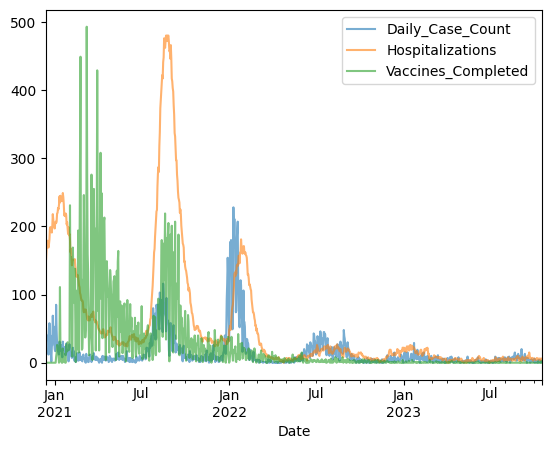

In [19]:
Acadia_cases = parish_cases[parish_cases.Parish=="Acadia"]
Acadia_plot = Acadia_cases.loc[288:]
hosp_plot = hospitalizations.loc[275:1313]
vaccine_plot = parish_vaccines[parish_vaccines.Location=="Acadia"]
Date_plot = pd.DataFrame()
Date_plot = Date_plot.append(Acadia_plot, ignore_index=True)
Date_plot = Date_plot.merge(hosp_plot, on=["Date"])
Date_plot = Date_plot.merge(vaccine_plot, on=["Date"])
Date_plot = Date_plot.drop(["Location", "Vaccines_Initiated", "Parish"], axis=1)
Date_plot.set_index("Date", inplace=True)
Date_plot.plot.line(alpha=.6)

As can be seen in the line plot, the timing of spikes in cases and hospitalizations as expected since hospitalized people would have likely counted as a new case for the day. There is also a decrease in cases over time as vaccinations increase the hospitalizations and cases tend to decrease.  

In [20]:
Date_plot.corr()

,Daily_Case_Count,Hospitalizations,Vaccines_Completed
Daily_Case_Count,1.000000,0.467372,0.116333
Hospitalizations,0.467372,1.000000,0.409593
Vaccines_Completed,0.116333,0.409593,1.000000


The correlation matrix shows that there is some correlation between Daily case counts and hospitalizations but is weaker between hospitalizations and completed vaccines as well as vaccines and daily case counts. What may show a better correlation of hospitalizations and daily case counts is if the total dialy case counts between all parishes, not only Acadia, as the hospitalizations are the total through the state. It would also be helpful to compare these between all parishes. What may also be explored is how the parishes vary in this regard and if demographics vary between these as well. It may also be helpful to look at the severity of the hospitalization or at the deaths resulted from COVID-19.

**Models**  
One model may be to use data from cases, total vaccinations in the area, and previous hospitalizations to predict the amount of new cases or hospitalizations in the future. If correlations are found a model using demographic information or local laws regarding COVID-19 safety may also be able ot predict future hospitalization or cases of COVID-19.

In [12]:
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb